#  スパッタリング率のプロット

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path2data = "/Users/y1u0d2/Downloads"
# path2data = "/Users/y1u0d2/Google Drive/マイドライブ/HamaLab_kotani/sputtering"
data_filename = "sp.xlsx"
# sheet_name = "si_self_substrate_size"
sheet_name = "si_self_all_in"

In [3]:
# read excel file
sy_df = pd.read_excel(os.path.join(path2data, data_filename), sheet_name=sheet_name)
sy_df.fillna(0, inplace=True)

In [4]:
# get unique combination of potential, height, and seed
unique_combination_of_potential_seed_height = sy_df.drop_duplicates(subset=["potential", "height", "seed"])[["potential", "height", "seed"]]

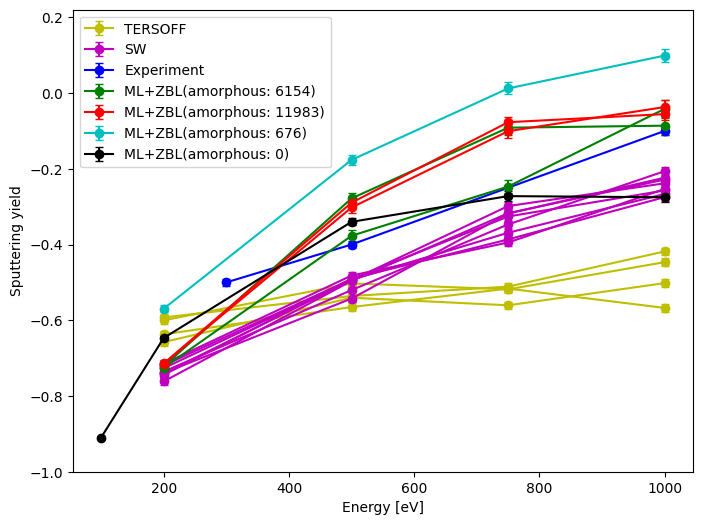

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

for unique_combination_dict in unique_combination_of_potential_seed_height.to_dict(orient="records"):
    potential = unique_combination_dict["potential"]
    height = unique_combination_dict["height"]
    seed = unique_combination_dict["seed"]

    if potential == "Experiment":
        each_potential_height_seed_df = sy_df[sy_df["potential"] == potential]
    else:
        each_potential_height_seed_df = sy_df[(sy_df["potential"] == potential) & (sy_df["height"] == height) & (sy_df["seed"] == seed)]

    ax.errorbar(
        each_potential_height_seed_df["energy"],
        each_potential_height_seed_df["sy_depo_ion_dose"],
        yerr=[
            each_potential_height_seed_df["sy_depo_ion_dose"] - each_potential_height_seed_df["lower_sy"],
            each_potential_height_seed_df["upper_sy"] - each_potential_height_seed_df["sy_depo_ion_dose"],
        ],
        capsize=3,
        marker="o",
        label=f"{potential}",
        c=each_potential_height_seed_df["color"].to_numpy()[0]
    )
ax.set_xlabel("Energy [eV]")
ax.set_ylabel("Sputtering yield")
ax.set_ylim(-1.0, 0.22)

handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)

# Ar -> Si injection

In [6]:
from mlptools.analyzer.yamamura_tawara import YamamuraTawaraSputteringYieldCalculator
import numpy as np

yt_calculator = YamamuraTawaraSputteringYieldCalculator(projectile="Ar", target="Si")

energy_list = [50, 100, 200 ,350, 500, 750, 1000]
sp_yt = yt_calculator.get_sputtering_yield(
    energy_list=energy_list
)

In [7]:
sy_df = pd.read_excel(os.path.join(path2data, data_filename), sheet_name="argon_injection")

ar_unique_combination_of_potential_seed_height = sy_df.drop_duplicates(subset=["potential", "seed"])[["potential", "seed"]]

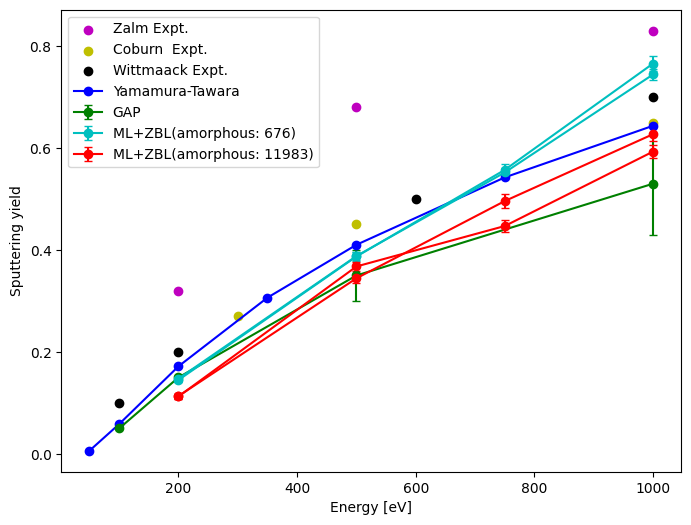

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

for unique_combination_dict in ar_unique_combination_of_potential_seed_height.to_dict(orient="records"):
    potential = unique_combination_dict["potential"]
    seed = unique_combination_dict["seed"]

    each_potential_height_seed_df = sy_df[(sy_df["potential"] == potential) & (sy_df["seed"] == seed)]
    if "Expt." in potential:
        ax.scatter(
            each_potential_height_seed_df["energy"],
            each_potential_height_seed_df["sp"],
            marker="o",
            label=f"{potential}",
            c=each_potential_height_seed_df["color"].to_numpy()[0]
        )
    else:
        ax.errorbar(
            each_potential_height_seed_df["energy"],
            each_potential_height_seed_df["sp"],
            yerr=[
                each_potential_height_seed_df["sp"] - each_potential_height_seed_df["pos_lower_bound"],
                each_potential_height_seed_df["pos_upper_bound"] - each_potential_height_seed_df["sp"],
            ],
            capsize=3,
            marker="o",
            label=f"{potential}",
            c=each_potential_height_seed_df["color"].to_numpy()[0]
        )

# plot Yamamura-Tawara model
ax.plot(
    energy_list,
    sp_yt,
    label="Yamamura-Tawara",
    marker="o",
    c="b"
)
ax.set_xlabel("Energy [eV]")
ax.set_ylabel("Sputtering yield")

handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)